In [1]:
import pandas as pd
from sklearn import linear_model

In [2]:
model = pd.read_csv('HR_comma_sep.csv')
model.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
salary_col = pd.get_dummies(model[['salary']])
salary_col.head()

,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False


In [4]:
model = pd.concat([model, salary_col], axis='columns')
model.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,False,True,False
1,0.80,0.86,5,262,6,0,1,0,sales,medium,False,False,True
2,0.11,0.88,7,272,4,0,1,0,sales,medium,False,False,True
3,0.72,0.87,5,223,5,0,1,0,sales,low,False,True,False
4,0.37,0.52,2,159,3,0,1,0,sales,low,False,True,False


In [6]:
model = model.drop(['salary', 'salary_high'], axis='columns')
model.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,True,False
1,0.80,0.86,5,262,6,0,1,0,sales,False,True
2,0.11,0.88,7,272,4,0,1,0,sales,False,True
3,0.72,0.87,5,223,5,0,1,0,sales,True,False
4,0.37,0.52,2,159,3,0,1,0,sales,True,False


In [7]:
department_col = pd.get_dummies(model['Department'])

In [9]:
department_col.shape

(14999, 10)

In [10]:
model = pd.concat([model, department_col], axis='columns')
model.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_low,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,True,...,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,sales,False,...,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,sales,False,...,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,sales,True,...,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,sales,True,...,False,False,False,False,False,False,False,True,False,False


In [11]:
model = model.drop(['Department', 'hr'], axis='columns')
model.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_low,salary_medium,IT,RandD,accounting,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,True,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,False,True,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,False,True,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,True,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,True,False,False,False,False,False,False,False,True,False,False


In [13]:
X = model.drop(['left'], axis='columns')
y = model['left']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
retain_model = linear_model.LogisticRegression(solver='lbfgs', max_iter=600)
retain_model.fit(X_train, y_train)

LogisticRegression(max_iter=600)

In [23]:
retain_model.score(X_test, y_test)

0.7836666666666666

ValueError: x and y must be the same size

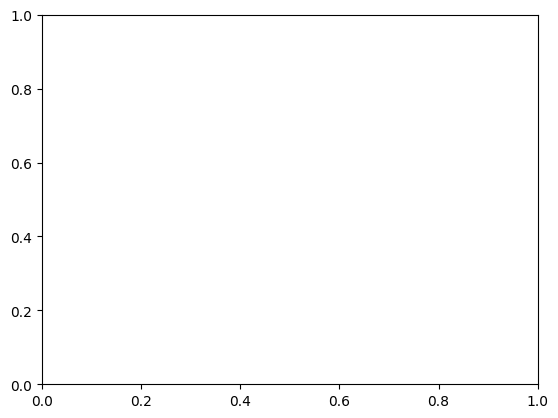

In [26]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, marker='+')
plt.scatter(X_test, retain_model.predict(X_test), color='red')